In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.4/982.4 kB 17.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found

In [3]:
!pip install ruamel.yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 18.2 MB/s eta 0:00:0000:01


In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
import sys
import ruamel.yaml
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [17]:
import kagglehub

# Download latest version
dataset_path = kagglehub.dataset_download("sergeysalytov/courier-dataset-for-yolo")

print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/courier-dataset-for-yolo


In [18]:
image = cv2.imread("/kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/train/1.jpeg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 300x168 and 3 channels.


In [19]:
os.makedirs("/kaggle/working/metrics", exist_ok=True)
os.makedirs("/kaggle/working/predictions", exist_ok=True)

In [20]:
model = YOLO("yolo12s.pt") 

In [21]:
image = "/kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/train/10.jpeg"
result_predict = model.predict(source = image, imgsz=(640))


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/train/10.jpeg: 480x640 1 person, 1 motorcycle, 18.4ms
Speed: 1.9ms preprocess, 18.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


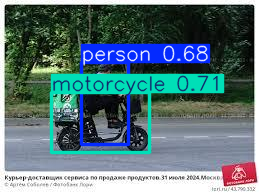

In [22]:
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [28]:
yaml = ruamel.yaml.YAML()
# yaml.preserve_quotes = True
with open(dataset_path + "/courier-dataset-yolo/dataset.yaml") as fp:
    data = yaml.load(fp)

In [34]:
path = dataset_path + "/courier-dataset-yolo/"
data['path'] = path

In [35]:
print(data)

{'path': '/kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/', 'train': 'images/train', 'val': 'images/val', 'test': 'images/test', 'names': {0: 'human-curier', 1: 'robot-curier'}}


In [36]:
with open("data1.yaml", "w") as f:
    yaml.dump(data, f)

In [37]:
Final_model = YOLO('yolo12s.yaml').load('yolo12s.pt')

Transferred 691/691 items from pretrained weights


In [38]:
Result_Final_model = Final_model.train(
    data="/kaggle/working/data1.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    project="/kaggle/working/training_results",
    # lr0=0.005,
    dropout=0.15,  # Для YOLO dropout задаётся в архитектуре модели, а не здесь
    # device='cpu',      # Должно быть строкой
    # optimizer='AdamW',  # Указывается строкой
    # Добавьте параметры для ускорения:
    # cache='ram',     # Кэширование данных
    # workers=4,       # Оптимально для Kaggle
    # close_mosaic=10, # Ускоряет обучение
    # pretrained=True  # Если используете предобученные веса
)

Ultralytics 8.3.113 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.yaml, data=/kaggle/working/data1.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/training_results, name=train2, exist_ok=False, pretrained=yolo12s.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    689408  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.3±0.7 MB/s, size: 10.9 KB)


train: Scanning /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/labels/train... 64 images, 14 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<00:00, 248.31it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.4±0.8 MB/s, size: 10.8 KB)


val: Scanning /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/labels/val... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 234.00it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/labels is not writeable, cache not saved.


Plotting labels to /kaggle/working/training_results/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/training_results/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.88G      1.234      6.083      1.569         45        640: 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

                   all         17         19       0.18      0.125      0.149     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.88G      1.308      6.456      1.642         44        640: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         17         19       0.21      0.125     0.0903     0.0506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.94G      1.152       4.73      1.506         35        640: 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         17         19      0.504      0.665      0.739      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.95G      1.167      3.372      1.467         37        640: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         17         19      0.898      0.888      0.962      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.95G      1.253      2.841      1.532         47        640: 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         17         19       0.82      0.967      0.923      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.97G       1.15      2.122       1.39         53        640: 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         17         19      0.642       0.79        0.9      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.97G      1.072      1.976      1.363         44        640: 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         17         19      0.782      0.933      0.954      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.97G      1.079      1.792      1.379         41        640: 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         17         19      0.496      0.687      0.701      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.97G      1.187      1.728      1.418         44        640: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         17         19      0.539      0.642      0.499       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.97G      1.349      1.867      1.536         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         17         19      0.324      0.808      0.688      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.97G      1.159       1.58      1.406         42        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         17         19       0.25      0.125      0.107     0.0676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.97G      1.208      1.501      1.465         41        640: 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         17         19     0.0219        0.2     0.0311     0.0178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.97G      1.225      1.602      1.504         35        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         17         19    0.00581     0.0333    0.00285    0.00137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.97G      1.227      1.494      1.495         39        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         17         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.97G      1.307      1.468       1.55         26        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         17         19          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.97G      1.301      1.448      1.503         51        640: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         17         19    0.00464        0.3    0.00389    0.00179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.97G       1.19      1.269      1.447         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         17         19     0.0468      0.233     0.0984     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.97G      1.188      1.255      1.439         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         17         19      0.149       0.28      0.129     0.0593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.97G      1.261      1.369      1.528         41        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         17         19      0.335      0.358      0.284      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.97G      1.347      1.345      1.566         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         17         19      0.361      0.392      0.367      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.97G      1.354      1.322      1.608         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         17         19      0.237      0.433      0.386      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.97G      1.238        1.3      1.509         40        640: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         17         19      0.263       0.65       0.56      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.97G      1.318      1.476      1.581         29        640: 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         17         19      0.197      0.617      0.261     0.0991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.97G      1.263      1.366      1.573         43        640: 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         17         19      0.244      0.525      0.486      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.97G      1.358      1.369       1.53         38        640: 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         17         19      0.149      0.558      0.221      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.97G      1.184      1.219      1.419         46        640: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         17         19     0.0783      0.361      0.152     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.97G       1.25      1.164      1.503         38        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         17         19     0.0584      0.333      0.166     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.97G      1.158      1.219      1.436         30        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         17         19      0.242      0.325      0.288     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.97G      1.182      1.219       1.46         38        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         17         19     0.0609      0.517      0.106     0.0491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.97G      1.197      1.188       1.46         46        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         17         19      0.217       0.35      0.159     0.0917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.97G      1.159      1.115      1.424         40        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         17         19      0.361      0.408      0.494      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.97G      1.079      1.079      1.383         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         17         19      0.663      0.325      0.432      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.97G      1.195      1.203      1.349         54        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         17         19       0.29       0.45      0.295      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.97G       1.43        1.3      1.625         52        640: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         17         19      0.165       0.45      0.139     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.97G      1.124      1.071      1.406         51        640: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         17         19      0.503      0.531      0.516      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.97G      1.319      1.218      1.544         35        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         17         19      0.585      0.562      0.607       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.97G      1.103      1.056       1.34         40        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         17         19      0.254      0.408      0.381      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.97G      1.118      1.063      1.383         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         17         19      0.436      0.483      0.403      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.97G      1.157      1.096      1.418         40        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         17         19      0.432      0.494      0.492      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.97G      1.174      1.117      1.436         46        640: 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         17         19      0.586      0.575      0.749      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.97G      1.041     0.9725      1.338         43        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         17         19      0.537       0.55      0.652      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.97G     0.9928     0.9055      1.238         52        640: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all         17         19      0.589      0.517      0.524      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.97G      1.034     0.9448      1.338         42        640: 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         17         19      0.647      0.552      0.643      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.97G     0.9854     0.8874      1.253         55        640: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         17         19      0.669        0.8      0.777      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.97G      1.013     0.9528       1.32         39        640: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         17         19      0.729      0.733      0.895      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.97G      1.021     0.9914      1.304         41        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         17         19        0.6       0.79      0.882      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.97G      1.017     0.9455      1.314         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         17         19        0.7      0.843      0.852      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.97G      1.024     0.9519      1.369         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         17         19      0.799        0.9      0.884      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.97G      1.033     0.8828      1.311         50        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         17         19      0.746      0.833      0.839      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.97G     0.9131     0.7768      1.232         34        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.794        0.8      0.849      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.97G     0.9207      0.812      1.257         39        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.896      0.823      0.869      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.97G     0.8947     0.7197      1.218         36        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.966       0.82      0.872       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.97G     0.9285     0.7716      1.256         54        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         17         19      0.878        0.8      0.831      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.97G       0.93     0.7558       1.23         41        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         17         19      0.776      0.933      0.911      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.97G     0.8186     0.7428      1.167         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         17         19      0.901      0.886      0.896      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.97G     0.8379     0.6955      1.171         53        640: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         19      0.812      0.839      0.938      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.97G     0.8381     0.7154      1.155         42        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         17         19       0.67      0.911      0.976      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.97G     0.9087     0.7632      1.263         35        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.837      0.709      0.894      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.97G     0.8648     0.7678      1.219         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         17         19       0.81      0.879      0.904      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.97G     0.7782     0.6931      1.166         36        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         17         19      0.955      0.825      0.904      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.97G      0.821     0.7041      1.198         37        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         19      0.916      0.867      0.906      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.97G     0.7752     0.6709      1.136         48        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         19      0.906       0.86      0.884      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.97G     0.7948     0.6249      1.154         42        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         17         19      0.988      0.831      0.867      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.97G     0.8436     0.7099      1.274         36        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         17         19      0.971      0.859      0.931      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.97G     0.7865     0.6424       1.15         68        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.943      0.858       0.96      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.97G     0.7393     0.6937      1.133         29        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         17         19      0.939      0.907       0.96      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.97G      0.842     0.8347      1.184         37        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.952        0.9      0.966      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.97G     0.8395     0.7425      1.154         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         19      0.899      0.933      0.959      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.97G     0.8351     0.6933      1.234         49        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.872        0.9       0.94      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.97G     0.7992      0.658       1.14         53        640: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         17         19      0.798      0.935      0.941      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.97G     0.7659     0.6237      1.118         36        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         17         19      0.803      0.779      0.891      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.97G     0.6914     0.6068      1.109         38        640: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         17         19      0.795      0.787      0.804      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.97G     0.6904     0.6385      1.094         46        640: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         17         19       0.81      0.775      0.834      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.97G     0.6814     0.6127      1.096         47        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.788      0.775      0.851      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.97G     0.8387     0.7166      1.202         31        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         17         19      0.814      0.894      0.905      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.97G     0.7202     0.6289      1.112         50        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         17         19       0.84      0.867      0.912      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.97G     0.6872     0.6158      1.097         57        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         17         19       0.88      0.924      0.981      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.97G     0.6795     0.5856      1.083         58        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         17         19      0.942        0.9      0.982      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.97G     0.6897     0.5645      1.112         51        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.961        0.9       0.98      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.97G     0.7131     0.6383      1.153         31        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         17         19      0.921        0.9      0.975      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.97G     0.6665      0.584      1.108         50        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         17         19      0.928      0.941      0.985      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.97G     0.6505     0.5603      1.062         45        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         17         19      0.938      0.947      0.983      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.97G     0.6759     0.6228      1.115         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         17         19       0.95      0.953      0.976        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.97G     0.6479      0.528      1.052         60        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.962      0.944      0.973       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.97G     0.6932     0.6666      1.149         34        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         17         19      0.962      0.895      0.974      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.97G     0.6419     0.5392       1.08         37        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         17         19      0.832      0.965      0.959      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.97G      0.596     0.5231      1.048         41        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         17         19      0.832      0.956      0.959      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.97G     0.6423     0.5749      1.055         26        640: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19       0.97      0.863      0.962      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.97G       0.65     0.5825        1.1         35        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         17         19      0.902       0.94      0.967      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.97G     0.6256     0.5267      1.053         45        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         17         19      0.973      0.896      0.971      0.715


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.97G     0.4712     0.4721     0.9279         16        640: 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         17         19      0.943        0.9      0.971      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.97G      0.484     0.4121     0.9817         26        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         17         19      0.956      0.893      0.973      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.97G     0.4659     0.4213     0.9801         16        640: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         17         19      0.953      0.894      0.978      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.97G     0.4665      0.417     0.9263         18        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19       0.91      0.965      0.991       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.97G     0.4606     0.3979     0.9312         14        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         19      0.906      0.984      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.97G     0.4571     0.4048     0.9526         18        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         17         19      0.909      0.992      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.97G     0.4176     0.3738     0.9155         16        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         17         19      0.916      0.993      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.97G     0.4343     0.3745     0.9156         21        640: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.927      0.994      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.97G     0.4585     0.3818       0.95         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         17         19      0.932      0.995      0.995       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.97G     0.4145     0.3884     0.9246         19        640: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         17         19      0.933      0.994      0.995      0.744



100 epochs completed in 0.075 hours.
Optimizer stripped from /kaggle/working/training_results/train2/weights/last.pt, 18.9MB
Optimizer stripped from /kaggle/working/training_results/train2/weights/best.pt, 18.9MB

Validating /kaggle/working/training_results/train2/weights/best.pt...
Ultralytics 8.3.113 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]


                   all         17         19      0.932      0.995      0.995       0.75
          human-curier         12         15          1      0.991      0.995      0.707
          robot-curier          4          4      0.864          1      0.995      0.793
Speed: 0.2ms preprocess, 8.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /kaggle/working/training_results/train2


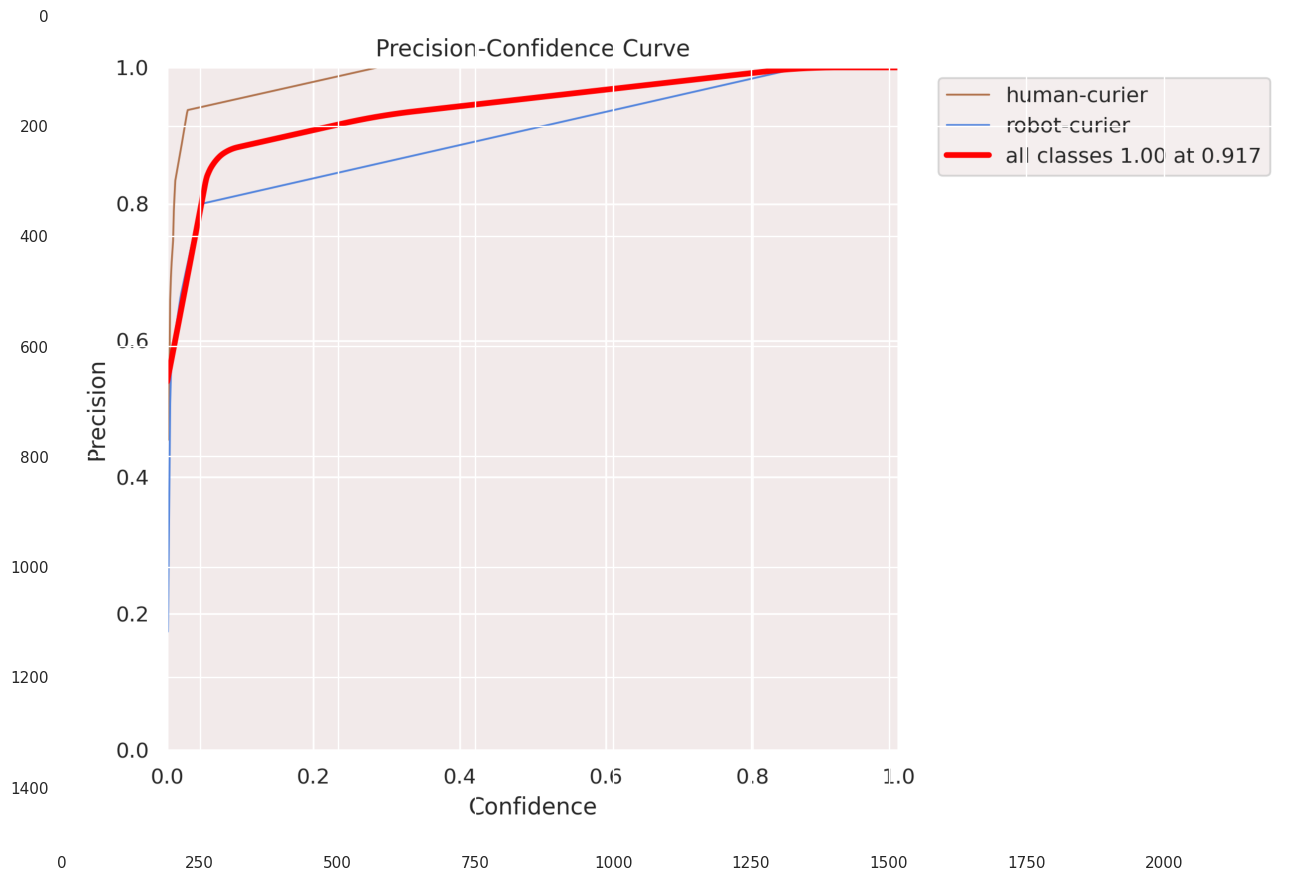

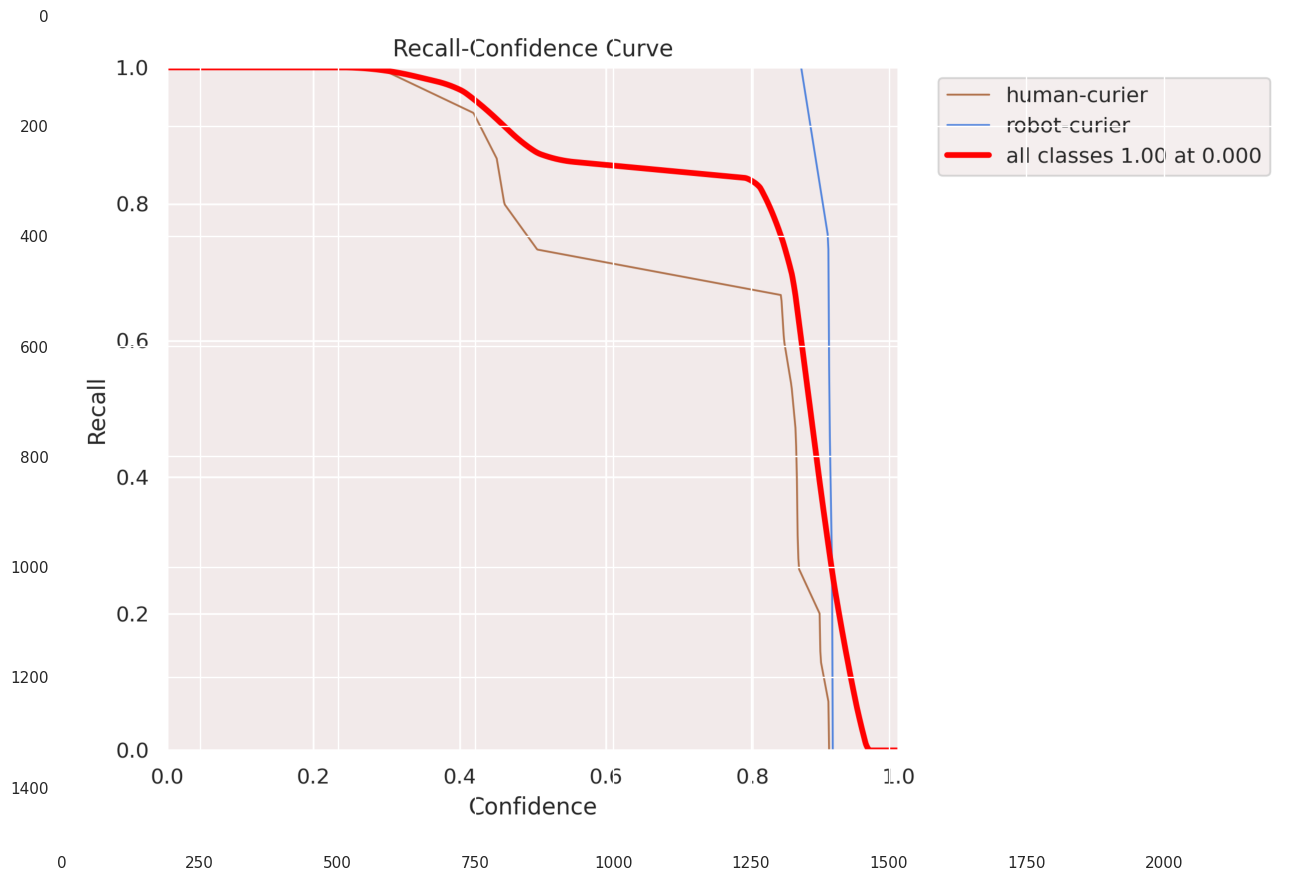

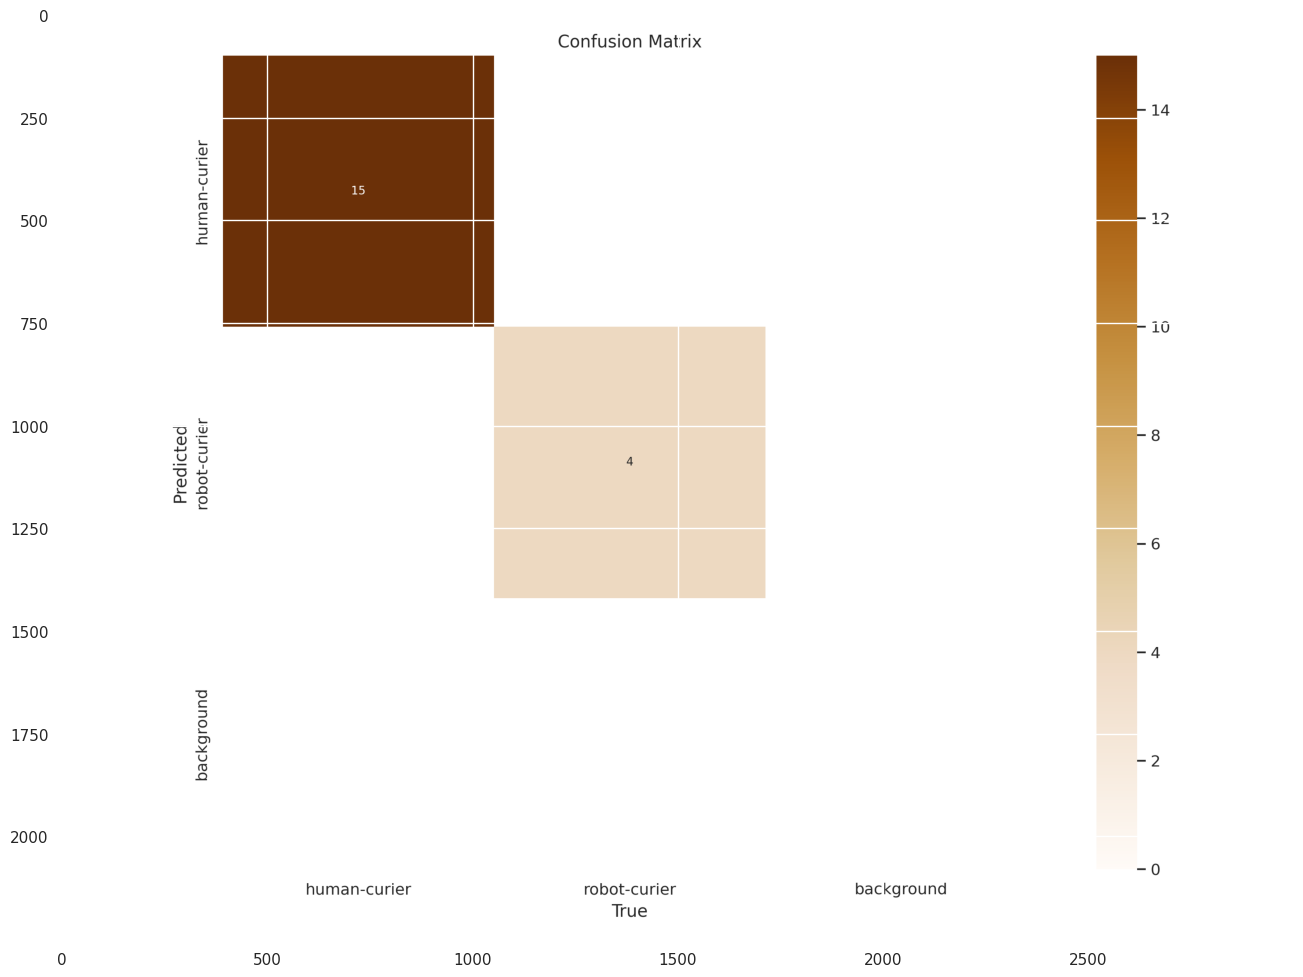

In [40]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

for i in list_of_metrics:
    img = cv2.imread(f"training_results/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [41]:
import json

with open("/kaggle/working/metrics/training_metrics.json", "w") as f:
    json.dump(Result_Final_model.results_dict, f) 

In [43]:
Valid_model = YOLO('training_results/train/weights/best.pt')

In [44]:
metrics = Valid_model.val(split = 'val')

Ultralytics 8.3.113 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 1.0±0.1 ms, read: 8.7±1.6 MB/s, size: 9.8 KB)


val: Scanning /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/labels/val... 17 images, 1 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 485.21it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/labels is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


                   all         17         19      0.932      0.995      0.995      0.746
          human-curier         12         15          1       0.99      0.995      0.699
          robot-curier          4          4      0.863          1      0.995      0.793
Speed: 5.1ms preprocess, 23.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val


In [45]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9315174520983285
metrics/recall(B):  0.9951266639797567
metrics/mAP50(B):  0.995
metrics/mAP50-95(B):  0.7461645187258038



image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/2.jpeg: 384x640 1 human-curier, 54.0ms
Speed: 2.2ms preprocess, 54.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


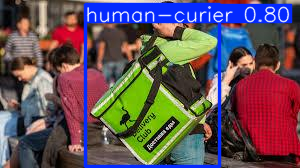


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/33.jpeg: 448x640 1 human-curier, 52.3ms
Speed: 2.5ms preprocess, 52.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


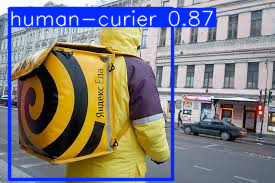


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/50.jpeg: 448x640 1 human-curier, 15.3ms
Speed: 1.5ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


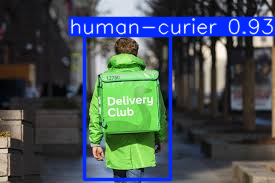


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/99.jpeg: 480x640 1 human-curier, 16.7ms
Speed: 1.6ms preprocess, 16.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


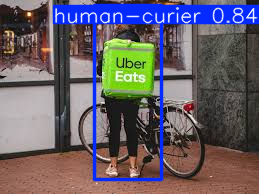


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/21.jpeg: 544x640 1 human-curier, 53.5ms
Speed: 2.5ms preprocess, 53.5ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)


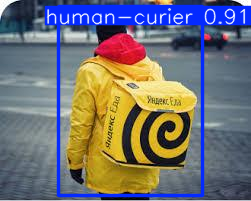


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/23.jpeg: 448x640 1 human-curier, 1 robot-curier, 15.9ms
Speed: 1.5ms preprocess, 15.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


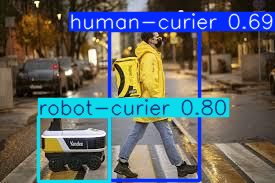


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/78.jpeg: 448x640 1 human-curier, 15.3ms
Speed: 1.5ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


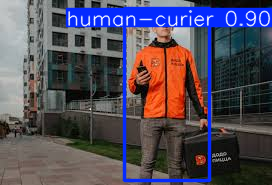


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/51.jpeg: 448x640 1 human-curier, 15.3ms
Speed: 1.4ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


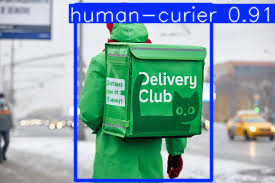


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/82.jpeg: 448x640 1 human-curier, 15.3ms
Speed: 1.4ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


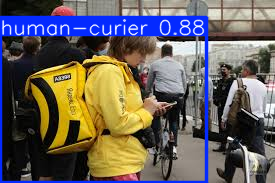


image 1/1 /kaggle/input/courier-dataset-for-yolo/courier-dataset-yolo/images/test/3.jpeg: 448x640 1 human-curier, 15.3ms
Speed: 1.4ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


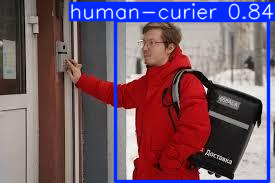

In [48]:
output_dir = "/kaggle/working/predictions"
os.makedirs(output_dir, exist_ok=True)

images = os.listdir(path + "/images/test")
for i in range(5, 15):
    image = os.path.join(path + "/images/test", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    plot = result_predict[0].plot()
    output_path = os.path.join(output_dir, f"pred_{images[i]}")
    cv2.imwrite(output_path, plot)
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    
    display(Image.fromarray(plot))